##Install Dependencies

In [ ]:
# Transformers installation
! pip install datasets
! pip install -q pytorchvideo evaluate torch decord
! pip install transformers==4.28.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/8

# Video classification

Video classification is the task of assigning a label or class to an entire video. Videos are expected to have only one class for each video. Video classification models take a video as input and return a prediction about which class the video belongs to. These models can be used to categorize what a video is all about. A real-world application of video classification is action / activity recognition, which is useful for fitness applications. It is also helpful for vision-impaired individuals, especially when they are commuting.

Login to your Hugging Face account so you can upload and share your model with the community. When prompted, enter your token to log in:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## Load UCF101 dataset

In [ ]:
from huggingface_hub import hf_hub_download

hf_dataset_identifier = "sayakpaul/ucf101-subset"
filename = "UCF101_subset.tar.gz"
file_path = hf_hub_download(repo_id=hf_dataset_identifier, filename=filename, repo_type="dataset")

After the subset has been downloaded, you need to extract the compressed archive:

In [ ]:
import tarfile

with tarfile.open(file_path) as t:
     t.extractall(".")

Now we will derive the set of labels present in the dataset. Also, create two dictionaries that'll be helpful when initializing the model:

* `label2id`: maps the class names to integers.
* `id2label`: maps the integers to class names.

In [ ]:
import os

dataset_path = "/content/UCF101_subset"

# Train videos
train_path = os.path.join(dataset_path, "train")
train_videos = []
for category in os.listdir(train_path):
    category_path = os.path.join(train_path, category)
    if os.path.isdir(category_path):
        videos = [os.path.join(category_path, video) for video in os.listdir(category_path) if video.endswith(".avi")]
        train_videos.extend(videos)
train_videos.sort()

# Validation videos
val_path = os.path.join(dataset_path, "val")
val_videos = []
for category in os.listdir(val_path):
    category_path = os.path.join(val_path, category)
    if os.path.isdir(category_path):
        videos = [os.path.join(category_path, video) for video in os.listdir(category_path) if video.endswith(".avi")]
        val_videos.extend(videos)
val_videos.sort()

# Test videos
test_path = os.path.join(dataset_path, "test")
test_videos = []
for category in os.listdir(test_path):
    category_path = os.path.join(test_path, category)
    if os.path.isdir(category_path):
        videos = [os.path.join(category_path, video) for video in os.listdir(category_path) if video.endswith(".avi")]
        test_videos.extend(videos)
test_videos.sort()

# Print all video paths
all_video_file_paths = train_videos + val_videos + test_videos
for video_path in all_video_file_paths:
    print(video_path)


/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c03.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c07.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c02.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c06.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c03.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g07_c04.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g07_c06.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c02.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g09_c06.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c01.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c02.avi
/content/UCF101_subset/train/ApplyEyeMakeup/v_Apply

In [ ]:
class_labels = sorted({str(path).split("/")[4] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress'].


In [ ]:
label2id

{'ApplyEyeMakeup': 0,
 'ApplyLipstick': 1,
 'Archery': 2,
 'BabyCrawling': 3,
 'BalanceBeam': 4,
 'BandMarching': 5,
 'BaseballPitch': 6,
 'Basketball': 7,
 'BasketballDunk': 8,
 'BenchPress': 9}

In [ ]:
id2label

{0: 'ApplyEyeMakeup',
 1: 'ApplyLipstick',
 2: 'Archery',
 3: 'BabyCrawling',
 4: 'BalanceBeam',
 5: 'BandMarching',
 6: 'BaseballPitch',
 7: 'Basketball',
 8: 'BasketballDunk',
 9: 'BenchPress'}

There are 10 unique classes. For each class, there are 30 videos in the training set.

## Load a model to fine-tune

Instantiate a video classification model from a pretrained checkpoint and its associated image processor. The model's encoder comes with pre-trained parameters, and the classification head is randomly initialized. The image processor will come in handy when writing the preprocessing pipeline for our dataset.

In [ ]:
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification

model_ckpt = "MCG-NJU/videomae-base"
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,  # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

Some weights of the model checkpoint at MCG-NJU/videomae-base were not used when initializing VideoMAEForVideoClassification: ['decoder.decoder_layers.1.layernorm_after.bias', 'mask_token', 'decoder.decoder_layers.3.layernorm_before.weight', 'decoder.decoder_layers.1.output.dense.bias', 'decoder.decoder_layers.2.attention.output.dense.weight', 'decoder.decoder_layers.0.layernorm_after.weight', 'decoder.decoder_layers.3.output.dense.weight', 'decoder.decoder_layers.0.layernorm_before.bias', 'decoder.decoder_layers.2.intermediate.dense.weight', 'decoder.decoder_layers.1.attention.attention.q_bias', 'decoder.decoder_layers.0.output.dense.bias', 'decoder.decoder_layers.2.attention.attention.key.weight', 'decoder.decoder_layers.2.layernorm_after.weight', 'decoder.decoder_layers.3.attention.attention.v_bias', 'decoder.decoder_layers.1.attention.attention.query.weight', 'decoder.decoder_layers.0.attention.output.dense.weight', 'decoder.norm.bias', 'decoder.decoder_layers.3.layernorm_after.bia

## Prepare the datasets for training

In [ ]:
import pytorchvideo.data

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
)

For the training dataset transformations, use a combination of uniform temporal subsampling, pixel normalization, random cropping, and random horizontal flipping. For the validation and evaluation dataset transformations, keep the same transformation chain except for random cropping and horizontal flipping. 

Use the `image_processor` associated with the pre-trained model to obtain the following information:

* Image mean and standard deviation with which the video frame pixels will be normalized.
* Spatial resolution to which the video frames will be resized.

Start by defining some constants.

In [ ]:
mean = image_processor.image_mean
std = image_processor.image_std
if "shortest_edge" in image_processor.size:
    height = width = image_processor.size["shortest_edge"]
else:
    height = image_processor.size["height"]
    width = image_processor.size["width"]
resize_to = (height, width)

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps

Now, define the dataset-specific transformations and the datasets respectively. Starting with the training set:

In [ ]:
dataset_root_path="/content/UCF101_subset"

In [ ]:
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=256, max_size=320),
                    RandomCrop(resize_to),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)

train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

The same sequence of workflow can be applied to the validation and evaluation sets:

In [ ]:
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),
    ]
)

val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "val"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [ ]:
print(train_dataset.num_videos, val_dataset.num_videos, test_dataset.num_videos)

300 30 75


## Visualize the preprocessed video for better debugging 

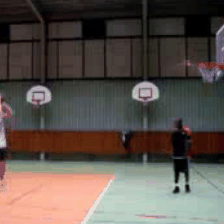

In [ ]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.
    
    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

sample_video = next(iter(train_dataset))
video_tensor = sample_video["video"]
display_gif(video_tensor)

## Train the model 

Leverage [`Trainer`](https://huggingface.co/docs/transformers/main_classes/trainer) from  🤗 Transformers for training the model. To instantiate a `Trainer`, you need to define the training configuration and an evaluation metric. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to configure the training. It requires an output folder name, which will be used to save the checkpoints of the model. It also helps sync all the information in the model repository on 🤗 Hub.

Most of the training arguments are self-explanatory, but one that is quite important here is `remove_unused_columns=False`. This one will drop any features not used by the model's call function. By default it's `True` because usually it's ideal to drop unused feature columns, making it easier to unpack inputs into the model's call function. But, in this case, you need the unused features ('video' in particular) in order to create `pixel_values` (which is a mandatory key our model expects in its inputs).

In [ ]:
batch_size=3

In [ ]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-ucf101-subset"
num_epochs = 4

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // batch_size) * num_epochs,
)

In [ ]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)



Also, define a `collate_fn`, which will be used to batch examples together. Each batch consists of 2 keys, namely `pixel_values` and `labels`.

In [ ]:
def collate_fn(examples):
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

Then you just pass all of this along with the datasets to `Trainer`:

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

/content/videomae-base-finetuned-ucf101-subset is already a clone of https://huggingface.co/meermoazzam41/videomae-base-finetuned-ucf101-subset. Make sure you pull the latest changes with `repo.git_pull()`.


You might wonder why you passed along the `image_processor` as a tokenizer when you preprocessed the data already. This is only to make sure the image processor configuration file (stored as JSON) will also be uploaded to the repo on the Hub.

Now fine-tune our model by calling the `train` method:

In [ ]:
import torch


In [ ]:
train_results = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
0,1.536900,1.217953,0.685714
1,0.850600,0.815431,0.800000
2,0.162900,0.290173,0.857143
3,0.299600,0.101598,0.957143


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Once training is completed, share your model to the Hub with the [push_to_hub()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.push_to_hub) method so everyone can use your model:

In [ ]:
trainer.push_to_hub()

To https://huggingface.co/meermoazzam41/videomae-base-finetuned-ucf101-subset
   282491a..e87aff1  main -> main

   282491a..e87aff1  main -> main

To https://huggingface.co/meermoazzam41/videomae-base-finetuned-ucf101-subset
   e87aff1..49e00fa  main -> main

   e87aff1..49e00fa  main -> main



'https://huggingface.co/meermoazzam41/videomae-base-finetuned-ucf101-subset/commit/e87aff1605e4d52054436ad46cc70dbfa7a61bef'

## Inference

Great, now that you have fine-tuned a model, you can use it for inference!

Load a video for inference:

In [ ]:
sample_test_video = next(iter(test_dataset))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
from transformers import pipeline

video_cls = pipeline(model="meermoazzam41/videomae-base-finetuned-ucf101-subset")
video_cls("/content/UCF101_subset/test/BenchPress/v_BenchPress_g05_c02.avi")

[{'score': 0.9810245037078857, 'label': 'BenchPress'},
 {'score': 0.006717784330248833, 'label': 'Archery'},
 {'score': 0.0018812204943969846, 'label': 'BaseballPitch'},
 {'score': 0.0017124845180660486, 'label': 'BasketballDunk'},
 {'score': 0.0017085726140066981, 'label': 'BandMarching'}]